# SE-2200E Notebook 6: A Better Prediction

Ningsong Shen

March 14, 2021

Conclusion: if we can use simple machine learning techniques on sparse data to predict, there is definitely opportunity for more complicated technologies to move in

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('../clean_data/sample_data.csv').drop_duplicates()
df = df[df["real_departure_time"] > 0]
df = df[df["scheduled_departure_time"] > 0]
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)
df.head()

,trip_id,start_date,route_id,stop_sequence,vehicle_id,scheduled_departure_time,real_departure_time
0,1346803,20201104,24,41,3140.0,2134.0,2169.0
1,1346803,20201105,24,41,3177.0,2134.0,2040.0
2,1346803,20201106,24,41,3143.0,2134.0,2040.0
3,1346803,20201109,24,41,3144.0,2134.0,2040.0
4,1346803,20201110,24,41,3178.0,2134.0,2040.0


In [3]:
cur_df = df.sample(10000)

X = cur_df[["trip_id", "start_date", "route_id", "stop_sequence", "vehicle_id", "scheduled_departure_time"]]
X['trip_id'] = X['trip_id'].astype('category')
X['route_id'] = X['route_id'].astype('category')
X['vehicle_id'] = X['vehicle_id'].astype('category')
y = cur_df["real_departure_time"].values
X_train, X_test, y_train, y_test = train_test_split(X, y)

sc = StandardScaler()
y_scaler = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)
y_train = y_scaler.fit_transform(y_train.reshape(-1, 1))
y_test = y_scaler.transform(y_test.reshape(-1, 1))

<ipython-input-3-28e35ed7121c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['trip_id'] = X['trip_id'].astype('category')
<ipython-input-3-28e35ed7121c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['route_id'] = X['route_id'].astype('category')
<ipython-input-3-28e35ed7121c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

In [4]:
regressor = MLPRegressor(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(4, 4), random_state=1)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

C:\Users\nings\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


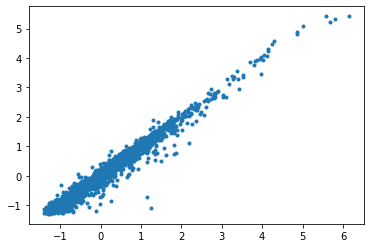

In [5]:
plt.scatter(y_test, y_pred, marker=".")

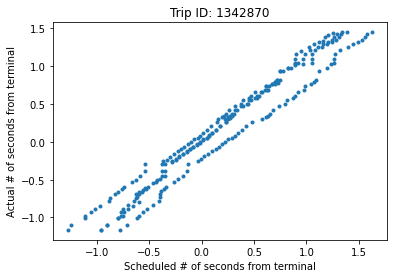

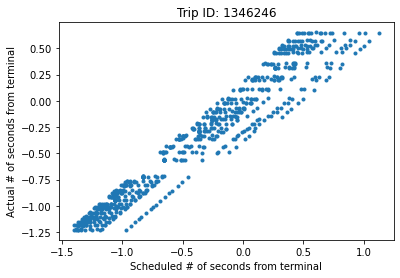

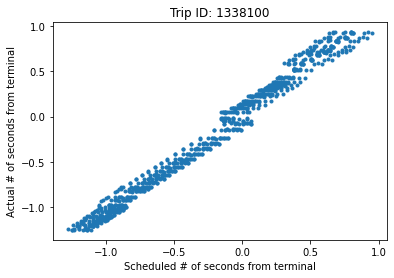

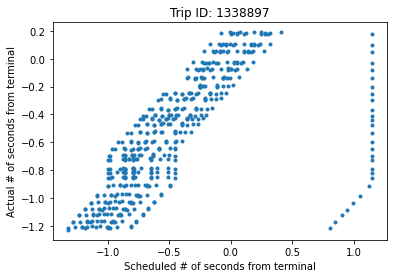

In [6]:
import random
trip_ids = [1338100, 1346246, 1342870, 1338897]
for i in random.sample(range(len(trip_ids)), 4):
    trip_df = df.loc[(df['trip_id'] == trip_ids[i])]
    X = trip_df[["trip_id", "start_date", "route_id", "stop_sequence", "vehicle_id", "scheduled_departure_time"]]
    y = trip_df["real_departure_time"]
    X = sc.transform(X)
    y = y_scaler.transform(y.values.reshape(-1, 1))
    # We instead use the trained model based on the entire dataset
    # linear_regressor = LinearRegression()
    # linear_regressor.fit(X, Y)
    y_pred = regressor.predict(X)
    plt.figure(i)
    plt.scatter(y, y_pred, marker=".")
    plt.title("Trip ID: " + str(trip_ids[i]))
    plt.xlabel("y")
    plt.ylabel("y_pred")

In [ ]:
This is a different way of plotting than in previous notebooks--this change is needed because we used multiple features here.